## Model training

In [1]:
import network
from importlib import reload
reload ( network )
from network import (
    initialise_training_environment,
    train)

In [2]:
model, optimiser, loss_func = initialise_training_environment()
model = train(model, optimiser, loss_func)

Model Architecture:
CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=6272, out_features=10, bias=True)
)


100%|██████████| 10/10 [01:51<00:00, 11.14s/it]


## Model Testing

In [5]:
from network import test
images, labels, pred_y = test(model)

#### Plotting correct labels

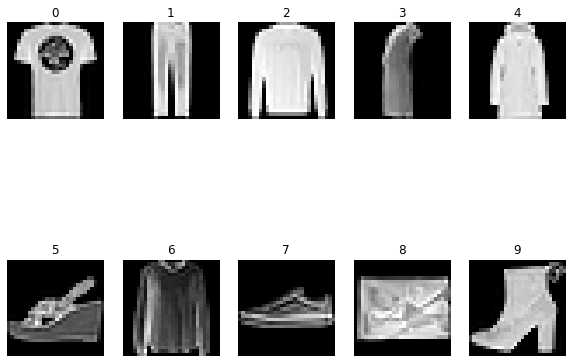

In [43]:
correct_predictions = list(np.where(pred_y.eq(labels))[0])
correct_predictions

figure_idx = []
idx = 0
element=0
while idx < 10:
    index_pos = [i for i,n in enumerate(labels) if n==idx][element]
    if index_pos in correct_predictions:
        figure_idx.append(index_pos)
        idx += 1
        element=0
    else:
        element += 1

figure = plt.figure(figsize=(10,8))
cols, rows = 5, 2
for idx in range(0,10):
    sample_idx = figure_idx[idx]
    img = images[sample_idx]
    label = pred_y[sample_idx].item()
    figure.add_subplot(rows, cols, idx+1)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

#### Plotting misclassified items

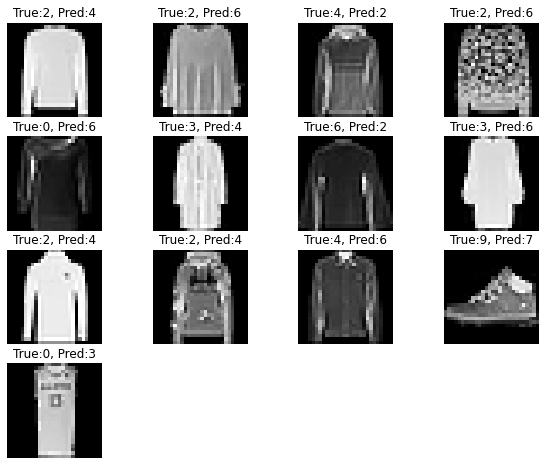

In [46]:
import numpy as np
from matplotlib import pyplot as plt

misclassified_items = list(np.where(pred_y.not_equal(labels))[0])

if misclassified_items:
    m = int(np.ceil(np.sqrt(len(misclassified_items))))

    figure = plt.figure(figsize=(10,8))
    cols, rows = m, m
    for idx in range(1, len(misclassified_items)):
        sample_idx = misclassified_items[idx]
        img = images[sample_idx]
        label = labels[sample_idx].item()
        pred = pred_y[sample_idx].item()
        figure.add_subplot(rows, cols, idx)
        plt.title(f'True:{label}, Pred:{pred}')
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap='gray')
    plt.show()
else:
    print('No misclassified items.')


#### Accuracy

In [49]:
accuracy = len(correct_predictions) / len(pred_y)
accuracy

0.86